In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from textwrap import wrap
import ast
import itertools
import collections
import seaborn as sns

### Simple EDA

In [12]:
df = pd.read_csv("NEW-compiled-usa.csv")

In [13]:
df.drop(columns = "Unnamed: 0", inplace = True)
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con..."
4,it could have ripped‚Ä¶ harder or do you think...,it could have ripped‚Ä¶ harder or do you think...,ENGLISH,it could have ripped‚Ä¶ harder or do you think...,"[('it', 'PRP'), ('could', 'MD'), ('have', 'VB'...","['could', 'ripped', 'harder', 'think', 'maskin...","['could', 'rip', 'hard', 'think', 'mask', 'iso...","['isolation', 'question', 'look', 'spike', 'ma..."
...,...,...,...,...,...,...,...,...
348545,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci..."
348546,do it others.... üí™üéâüíâü§ô #vaccinesave...,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']"
348547,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']"
348548,yay üôåüèª congrats dr. j being fully vaccin...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'feeling', 'safetyfirst', 'vaccine..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Text                               80000 non-null  object
 1   new_text                           80000 non-null  object
 2   languages                          80000 non-null  object
 3   new_text_after_translation         80000 non-null  object
 4   pos_tagged_words                   80000 non-null  object
 5   words_processed_all                80000 non-null  object
 6   words_processed_noun_adj_verb_adv  80000 non-null  object
 7   words_processed_noun               80000 non-null  object
dtypes: object(8)
memory usage: 4.9+ MB


In [5]:
df[df.duplicated()==True]

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
62596,#NAME?,#NAME?,Unknown,#NAME?,"[('name', 'NN')]",['name'],['name'],['name']
78989,#NAME?,#NAME?,ENGLISH,#NAME?,"[('name', 'NN')]",['name'],['name'],['name']


In [6]:
df.describe()

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
count,80000,80000,80000,80000,80000,80000,80000,80000
unique,79996,79994,237,79973,79057,77481,75631,63917
top,#NAME?,#NAME?,ENGLISH,#NAME?,[],['pfizer'],[],[]
freq,5,6,58805,6,90,229,446,2764


In [7]:
df.dtypes

Text                                 object
new_text                             object
languages                            object
new_text_after_translation           object
pos_tagged_words                     object
words_processed_all                  object
words_processed_noun_adj_verb_adv    object
words_processed_noun                 object
dtype: object

In [8]:
df.head()

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,this was response post praising pfizer vaccine...,this was response post praising pfizer vaccine...,ENGLISH,this was response post praising pfizer vaccine...,"[('this', 'DT'), ('was', 'VBD'), ('response', ...","['response', 'post', 'praise', 'pfizer', 'vacc...","['response', 'post', 'praise', 'pfizer', 'vacc...","['response', 'post', 'pfizer', 'vaccine', 'org..."
1,les van poner pfizer pinches morrillos cagason...,les van poner pfizer pinches morrillos cagason...,SPANISH,They're going to put Pfizer on you fucking luc...,"[('they', 'PRP'), ('re', 'VBP'), ('going', 'VB...","['go', 'put', 'pfizer', 'fuck', 'lucky', 'shit...","['go', 'put', 'pfizer', 'fuck', 'lucky', 'shit...","['pfizer', 'shithead']"
2,after may 2nd pfizer vax 6 days id be glad go ...,after may 2nd pfizer vax 6 days id be glad go ...,ENGLISH,after may 2nd pfizer vax 6 days id be glad go ...,"[('after', 'IN'), ('may', 'MD'), ('and', 'CC')...","['may', 'pfizer', 'van', 'day', 'I', 'd', 'gla...","['day', 'glad', 'go', 'help', 'work', 'problem...","['day', 'problem', 'mile', 'place']"
3,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may 1...,ENGLISH,cher i got my second pfizer vaccine shot may 1...,"[('cher', 'NN'), ('i', 'NN'), ('got', 'VBD'), ...","['cher', 'get', 'second', 'pfizer', 'vaccine',...","['cher', 'get', 'second', 'pfizer', 'vaccine',...","['cher', 'pfizer', 'vaccine', 'cher', 'guess',..."
4,eso es con pfizer,eso es con pfizer,Unknown,that's with pfizer,"[('that', 'IN'), ('i', 'NN'), ('with', 'IN'), ...",['pfizer'],['pfizer'],['pfizer']


### Sentence Length Distribution

In [11]:
sns.set(rc = {'figure.figsize':(6,6)})

Max length: 939, Min length: 9, Average Length :  198.3247894736842


<AxesSubplot:>

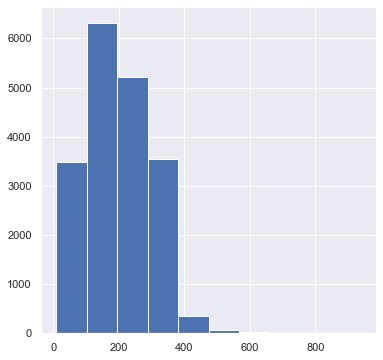

In [12]:
#sentence length distribution
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Text'].str.len()),min(df['Text'].str.len()),df['Text'].str.len().mean()))
df['Text'].str.len().hist()

### Word Count

In [15]:
#Review word count: Just to get a simple sensing of the word count in the reviews
word_count = []
for each in df["pos_tagged_words"]:
    words_list = each.split(" ")
    word_count.append(len(words_list))
df["word_count"] = word_count

In [16]:
df.head()

,Text,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,word_count
0,"vaccinated, rainbow, #, vaccinated, #, covidva...","[('vaccinated', 'VBN'), ('rainbow', 'NN'), ('v...","['vaccinated', 'rainbow', 'vaccinated', 'covid...","['vaccinated', 'vaccinate', 'covidvaccine']",['covidvaccine'],8
1,"very, unfortunate, situation, ., following, st...","[('very', 'RB'), ('unfortunate', 'JJ'), ('situ...","['unfortunate', 'situation', 'following', 'sto...","['unfortunate', 'situation', 'follow', 'stop',...","['situation', 'stop', 'shipment', 'bangladesh'...",30
2,"statement, by, stating, all, australians, can,...","[('statement', 'NN'), ('by', 'IN'), ('stating'...","['statement', 'stating', 'australian', 'vaccin...","['statement', 'state', 'australian', 'vaccinat...","['statement', 'australian', 'government', 'vac...",72
3,"true, dat, ., but, also, chances, that, many, ...","[('true', 'JJ'), ('dat', 'NN'), ('but', 'CC'),...","['true', 'dat', 'also', 'chance', 'many', 'peo...","['true', 'also', 'chance', 'many', 'people', '...","['people', 'vaccine', 'disease', 'vaccine', 'm...",74
4,"before, :, couid, -, nineteen, vaccines, got, ...","[('before', 'IN'), ('couid', 'NN'), ('nineteen...","['couid', 'nineteen', 'vaccine', 'got', 'micro...","['couid', 'vaccine', 'get', 'microchip', 'iver...","['vaccine', 'microchip', 'ivermectin']",16


In [17]:
df["word_count"].describe()

count    19000.000000
mean        46.014316
std         24.380774
min          1.000000
25%         26.000000
50%         42.000000
75%         66.000000
max        194.000000
Name: word_count, dtype: float64

<AxesSubplot:>

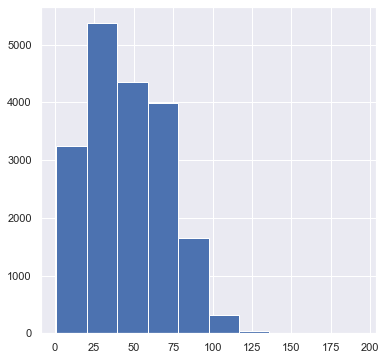

In [18]:
#word length distribution
df['word_count'].hist()

## VADER Sentiment

In [14]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [15]:
#Test
sid.polarity_scores("This is an excellent car with great mileage")

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8316}

In [13]:
words_processed_all = df['words_processed_all'].to_list()
print(words_processed_all[0])
words_processed_all[0][0]

['response', 'post', 'praise', 'pfizer', 'vaccine', 'april', 'gop', 'party', 'organizer', 'texas', 'regularly', 'post', 'evangelical', 'christian', 'meme', 'routinely', 'tell', 'people', 'eat', 'dick', 'widow', 'wife', 'orphan', 'son', 'die', 'covid']


'['

In [14]:
import ast
new_list = []
for str_list in words_processed_all:
    a_list = ast.literal_eval(str_list)
    new_list.append(a_list)

In [15]:
len(new_list)

80000

In [16]:
new_list[0]

['response',
 'post',
 'praise',
 'pfizer',
 'vaccine',
 'april',
 'gop',
 'party',
 'organizer',
 'texas',
 'regularly',
 'post',
 'evangelical',
 'christian',
 'meme',
 'routinely',
 'tell',
 'people',
 'eat',
 'dick',
 'widow',
 'wife',
 'orphan',
 'son',
 'die',
 'covid']

In [17]:
new_list[0][0]

'response'

In [16]:
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con..."
4,it could have ripped‚Ä¶ harder or do you think...,it could have ripped‚Ä¶ harder or do you think...,ENGLISH,it could have ripped‚Ä¶ harder or do you think...,"[('it', 'PRP'), ('could', 'MD'), ('have', 'VB'...","['could', 'ripped', 'harder', 'think', 'maskin...","['could', 'rip', 'hard', 'think', 'mask', 'iso...","['isolation', 'question', 'look', 'spike', 'ma..."
...,...,...,...,...,...,...,...,...
348545,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci..."
348546,do it others.... üí™üéâüíâü§ô #vaccinesave...,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']"
348547,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']"
348548,yay üôåüèª congrats dr. j being fully vaccin...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'feeling', 'safetyfirst', 'vaccine..."


In [18]:
all_words_df = df[['Text', 'new_text_after_translation', 'words_processed_all']].copy()

In [19]:
all_words_df

,Text,pos_tagged_words,words_processed_all
0,this was response post praising pfizer vaccine...,"[('this', 'DT'), ('was', 'VBD'), ('response', ...","['response', 'post', 'praise', 'pfizer', 'vacc..."
1,les van poner pfizer pinches morrillos cagason...,"[('they', 'PRP'), ('re', 'VBP'), ('going', 'VB...","['go', 'put', 'pfizer', 'fuck', 'lucky', 'shit..."
2,after may 2nd pfizer vax 6 days id be glad go ...,"[('after', 'IN'), ('may', 'MD'), ('and', 'CC')...","['may', 'pfizer', 'van', 'day', 'I', 'd', 'gla..."
3,cher i got my second pfizer vaccine shot may 1...,"[('cher', 'NN'), ('i', 'NN'), ('got', 'VBD'), ...","['cher', 'get', 'second', 'pfizer', 'vaccine',..."
4,eso es con pfizer,"[('that', 'IN'), ('i', 'NN'), ('with', 'IN'), ...",['pfizer']
...,...,...,...
79995,why this moderna got me feeling stoned,"[('why', 'WRB'), ('this', 'DT'), ('modern', 'J...","['modern', 'get', 'feel', 'stone']"
79996,which vax thx. get my 2 friday. moderna,"[('which', 'WDT'), ('van', 'VBZ'), ('the', 'DT...","['van', 'get', 'two', 'friday', 'modern']"
79997,congratulations i had moderna vaccine; side ef...,"[('congratulations', 'NNS'), ('i', 'VBP'), ('h...","['congratulation', 'modern', 'vaccine', 'side_..."
79998,moderna shot 1 gave me drew brees arm but no o...,"[('modern', 'JJ'), ('shot', 'NN'), ('one', 'CD...","['modern', 'shot', 'one', 'give', 'draw', 'tre..."


In [20]:
all_words_df['words_list'] = new_list

In [21]:
all_words_df.drop(columns = "words_processed_all", inplace = True)
all_words_df

,Text,pos_tagged_words,words_list
0,this was response post praising pfizer vaccine...,"[('this', 'DT'), ('was', 'VBD'), ('response', ...","[response, post, praise, pfizer, vaccine, apri..."
1,les van poner pfizer pinches morrillos cagason...,"[('they', 'PRP'), ('re', 'VBP'), ('going', 'VB...","[go, put, pfizer, fuck, lucky, shithead, go, g..."
2,after may 2nd pfizer vax 6 days id be glad go ...,"[('after', 'IN'), ('may', 'MD'), ('and', 'CC')...","[may, pfizer, van, day, I, d, glad, go, help, ..."
3,cher i got my second pfizer vaccine shot may 1...,"[('cher', 'NN'), ('i', 'NN'), ('got', 'VBD'), ...","[cher, get, second, pfizer, vaccine, shoot, ma..."
4,eso es con pfizer,"[('that', 'IN'), ('i', 'NN'), ('with', 'IN'), ...",[pfizer]
...,...,...,...
79995,why this moderna got me feeling stoned,"[('why', 'WRB'), ('this', 'DT'), ('modern', 'J...","[modern, get, feel, stone]"
79996,which vax thx. get my 2 friday. moderna,"[('which', 'WDT'), ('van', 'VBZ'), ('the', 'DT...","[van, get, two, friday, modern]"
79997,congratulations i had moderna vaccine; side ef...,"[('congratulations', 'NNS'), ('i', 'VBP'), ('h...","[congratulation, modern, vaccine, side_effect,..."
79998,moderna shot 1 gave me drew brees arm but no o...,"[('modern', 'JJ'), ('shot', 'NN'), ('one', 'CD...","[modern, shot, one, give, draw, tree, arm, sid..."


In [22]:
all_words_df['words_list'][0]

['response',
 'post',
 'praise',
 'pfizer',
 'vaccine',
 'april',
 'gop',
 'party',
 'organizer',
 'texas',
 'regularly',
 'post',
 'evangelical',
 'christian',
 'meme',
 'routinely',
 'tell',
 'people',
 'eat',
 'dick',
 'widow',
 'wife',
 'orphan',
 'son',
 'die',
 'covid']

In [23]:
' '.join(all_words_df['words_list'][0])

'response post praise pfizer vaccine april gop party organizer texas regularly post evangelical christian meme routinely tell people eat dick widow wife orphan son die covid'

In [24]:
new_col = []
all_lists = all_words_df['words_list']
for a_list in all_lists:
    new_text = ' '.join(a_list)
    new_col.append(new_text)

In [25]:
new_col

['response post praise pfizer vaccine april gop party organizer texas regularly post evangelical christian meme routinely tell people eat dick widow wife orphan son die covid',
 'go put pfizer fuck lucky shithead go get vaccinate',
 'may pfizer van day I d glad go help work problem fifty mile place',
 'cher get second pfizer vaccine shoot may est fully vaccinated cher still wear_mask everywhere go even work guess target mandate target employee wear_mask see work today work weekend mask',
 'pfizer',
 'syringe ed pfizer april',
 'dose pfizer',
 'double shot pfizer',
 'renault already two pfizer',
 'couple thing wife ra take plaquenil plus never problem get refill also pfizer jab test antibodie two month later negligible antibody med counteract van',
 'great back april pfizer two shot',
 'side_effect pfizer feel like somebody punch right arm',
 'two dose pfizer also sore arm day',
 'chile apply booster dose vaccinate sinovac via astrazeneca pfizer apparently compatible',
 'first dose pfiz

In [26]:
all_words_df['new_text'] = new_col
all_words_df

,Text,pos_tagged_words,words_list,new_text
0,this was response post praising pfizer vaccine...,"[('this', 'DT'), ('was', 'VBD'), ('response', ...","[response, post, praise, pfizer, vaccine, apri...",response post praise pfizer vaccine april gop ...
1,les van poner pfizer pinches morrillos cagason...,"[('they', 'PRP'), ('re', 'VBP'), ('going', 'VB...","[go, put, pfizer, fuck, lucky, shithead, go, g...",go put pfizer fuck lucky shithead go get vacci...
2,after may 2nd pfizer vax 6 days id be glad go ...,"[('after', 'IN'), ('may', 'MD'), ('and', 'CC')...","[may, pfizer, van, day, I, d, glad, go, help, ...",may pfizer van day I d glad go help work probl...
3,cher i got my second pfizer vaccine shot may 1...,"[('cher', 'NN'), ('i', 'NN'), ('got', 'VBD'), ...","[cher, get, second, pfizer, vaccine, shoot, ma...",cher get second pfizer vaccine shoot may est f...
4,eso es con pfizer,"[('that', 'IN'), ('i', 'NN'), ('with', 'IN'), ...",[pfizer],pfizer
...,...,...,...,...
79995,why this moderna got me feeling stoned,"[('why', 'WRB'), ('this', 'DT'), ('modern', 'J...","[modern, get, feel, stone]",modern get feel stone
79996,which vax thx. get my 2 friday. moderna,"[('which', 'WDT'), ('van', 'VBZ'), ('the', 'DT...","[van, get, two, friday, modern]",van get two friday modern
79997,congratulations i had moderna vaccine; side ef...,"[('congratulations', 'NNS'), ('i', 'VBP'), ('h...","[congratulation, modern, vaccine, side_effect,...",congratulation modern vaccine side_effect sore...
79998,moderna shot 1 gave me drew brees arm but no o...,"[('modern', 'JJ'), ('shot', 'NN'), ('one', 'CD...","[modern, shot, one, give, draw, tree, arm, sid...",modern shot one give draw tree arm side_effect...


In [17]:
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con..."
4,it could have ripped‚Ä¶ harder or do you think...,it could have ripped‚Ä¶ harder or do you think...,ENGLISH,it could have ripped‚Ä¶ harder or do you think...,"[('it', 'PRP'), ('could', 'MD'), ('have', 'VB'...","['could', 'ripped', 'harder', 'think', 'maskin...","['could', 'rip', 'hard', 'think', 'mask', 'iso...","['isolation', 'question', 'look', 'spike', 'ma..."
...,...,...,...,...,...,...,...,...
348545,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci..."
348546,do it others.... üí™üéâüíâü§ô #vaccinesave...,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']"
348547,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']"
348548,yay üôåüèª congrats dr. j being fully vaccin...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'feeling', 'safetyfirst', 'vaccine..."


In [18]:
df['scores'] = df['new_text_after_translation'].apply(lambda tweet: sid.polarity_scores(tweet))
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,scores
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...","{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos...","{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp..."
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...","{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp..."
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,it could have ripped‚Ä¶ harder or do you think...,it could have ripped‚Ä¶ harder or do you think...,ENGLISH,it could have ripped‚Ä¶ harder or do you think...,"[('it', 'PRP'), ('could', 'MD'), ('have', 'VB'...","['could', 'ripped', 'harder', 'think', 'maskin...","['could', 'rip', 'hard', 'think', 'mask', 'iso...","['isolation', 'question', 'look', 'spike', 'ma...","{'neg': 0.156, 'neu': 0.747, 'pos': 0.097, 'co..."
...,...,...,...,...,...,...,...,...,...
348545,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci...","{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp..."
348546,do it others.... üí™üéâüíâü§ô #vaccinesave...,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
348547,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
348548,yay üôåüèª congrats dr. j being fully vaccin...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'feeling', 'safetyfirst', 'vaccine...","{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp..."


In [19]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,scores,compound
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...","{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co...",-0.6249
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos...","{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.6712
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...","{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...",0.3400
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,it could have ripped‚Ä¶ harder or do you think...,it could have ripped‚Ä¶ harder or do you think...,ENGLISH,it could have ripped‚Ä¶ harder or do you think...,"[('it', 'PRP'), ('could', 'MD'), ('have', 'VB'...","['could', 'ripped', 'harder', 'think', 'maskin...","['could', 'rip', 'hard', 'think', 'mask', 'iso...","['isolation', 'question', 'look', 'spike', 'ma...","{'neg': 0.156, 'neu': 0.747, 'pos': 0.097, 'co...",-0.4019
...,...,...,...,...,...,...,...,...,...,...
348545,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci...","{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.3182
348546,do it others.... üí™üéâüíâü§ô #vaccinesave...,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
348547,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
348548,yay üôåüèª congrats dr. j being fully vaccin...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'feeling', 'safetyfirst', 'vaccine...","{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, '

In [20]:
df["compound"].value_counts()

 0.0000    63389
-0.2960     5708
 0.3612     5699
 0.4404     4833
 0.4019     3859
           ...  
 0.2956        1
 0.2093        1
 0.3225        1
 0.7894        1
 0.3157        1
Name: compound, Length: 15290, dtype: int64

In [21]:
sentiment = []
for each in df["compound"]:
    if each == 0:
        sentiment.append("neutral")
    elif each > 0:
        sentiment.append("positive")
    else:
        sentiment.append("negative")

In [23]:
df["sentiment"] = sentiment

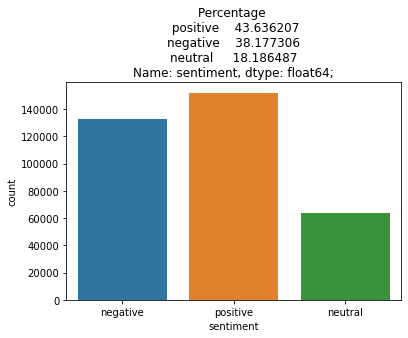

In [25]:
sns.countplot(x="sentiment", data=df)
normalise_count = df['sentiment'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

In [26]:
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,scores,compound,sentiment
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...","{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co...",-0.6249,negative
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos...","{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.6712,negative
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...","{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...",0.3400,positive
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,it could have ripped‚Ä¶ harder or do you think...,it could have ripped‚Ä¶ harder or do you think...,ENGLISH,it could have ripped‚Ä¶ harder or do you think...,"[('it', 'PRP'), ('could', 'MD'), ('have', 'VB'...","['could', 'ripped', 'harder', 'think', 'maskin...","['could', 'rip', 'hard', 'think', 'mask', 'iso...","['isolation', 'question', 'look', 'spike', 'ma...","{'neg': 0.156, 'neu': 0.747, 'pos': 0.097, 'co...",-0.4019,negative
...,...,...,...,...,...,...,...,...,...,...,...
348545,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci...","{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.3182,positive
348546,do it others.... üí™üéâüíâü§ô #vaccinesave...,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
348547,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
348548,yay üôåüèª congrats dr. j being fully vaccin...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat',

In [27]:
pos = df[df["sentiment"] == "positive"]
neg = df[df["sentiment"] == "negative"]
neu = df[df["sentiment"] == "neutral"]

In [28]:
for each in pos.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: i honestly believe that vaccinated are ones getting spreading virus way more than unvaxxed. i am unvaxed not once have had covid
 
Tweet: got my pfizer first dose yesterday. yay.
 
Tweet: if you want do your part protect ontario‚Äôs children layer precautions around them: get fully vaccinated, distance mask. be careful about your close contacts. when vaccines are available under 12s let‚Äôs have effective approach get them arms fast.
 


In [29]:
for each in neu.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: ‚Äúunvaccinated‚Äù versus ‚Äúregular‚Äù ü•≤üòÖ
 
Tweet: there‚Äôs difference between mandates convincing people get vaccinated. mandates can result job losses evictions end up exacerbating pandemic by putting these unvaccinated people street..
 
Tweet: it‚Äôs too soon we should not cave anti-science anti-mask antivax cult.
 


In [30]:
for each in neg.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: you do know covid rates are much higher usa then mexico besides are you not party who is anti mask anti vax thinks its all hoax ...or is it because its immigrants that you now have problem with covid19
 
Tweet: but pfizer, fda, who, etc. have continually stated there is no scientific evidence that vaccines reduce infection or transmission, people won‚Äôt believe it.
 
Tweet: lot people who are unvaccinated do not wear masks. i'm vaccinated but i had cancer, so i'm careful wear my mask.
 


In [31]:
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,scores,compound,sentiment
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...","{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co...",-0.6249,negative
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos...","{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.6712,negative
2,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...","{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'comp...",0.3400,positive
3,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,it could have ripped‚Ä¶ harder or do you think...,it could have ripped‚Ä¶ harder or do you think...,ENGLISH,it could have ripped‚Ä¶ harder or do you think...,"[('it', 'PRP'), ('could', 'MD'), ('have', 'VB'...","['could', 'ripped', 'harder', 'think', 'maskin...","['could', 'rip', 'hard', 'think', 'mask', 'iso...","['isolation', 'question', 'look', 'spike', 'ma...","{'neg': 0.156, 'neu': 0.747, 'pos': 0.097, 'co...",-0.4019,negative
...,...,...,...,...,...,...,...,...,...,...,...
348545,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci...","{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.3182,positive
348546,do it others.... üí™üéâüíâü§ô #vaccinesave...,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
348547,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
348548,yay üôåüèª congrats dr. j being fully vaccin...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat',

In [34]:
df.to_csv("ALL_VADER_USA.csv")